In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
model_path = './results/1538450275/'

lc = pd.read_csv(model_path + '/learning_curve.tsv', sep='\t')
mi = pd.read_csv(model_path + '/model_info.tsv', sep='\t')

In [3]:
mi

,Unnamed: 0,batch_size,lr,name,window_size
0,0,4096,0.0001,conv_nn_2,1024


In [4]:
lc.head()

,Unnamed: 0,Batch,Epoch,Mean Loss (epoch),Mean Loss (last batches),Valid Mean AUC
0,0,244.0,0,NaN,0.161631,NaN
1,1,488.0,0,NaN,0.143228,NaN
2,2,732.0,0,NaN,0.137514,NaN
3,3,976.0,0,NaN,0.108300,NaN
4,4,1220.0,0,NaN,0.134482,NaN


In [5]:
# filter learning curve only for points with Mean Loss for the entire Epoch
epoch_filt_lc = lc.dropna(axis=0, subset=['Mean Loss (epoch)'])
epoch_filt_lc

,Unnamed: 0,Batch,Epoch,Mean Loss (epoch),Mean Loss (last batches),Valid Mean AUC
15,15,NaN,0,0.114410,NaN,0.768198
31,31,NaN,1,0.100170,NaN,0.834621
47,47,NaN,2,0.095574,NaN,0.861285
63,63,NaN,3,0.091160,NaN,0.868326
79,79,NaN,4,0.088264,NaN,0.887178
95,95,NaN,5,0.085112,NaN,0.891162
111,111,NaN,6,0.082924,NaN,0.898618
127,127,NaN,7,0.081321,NaN,0.897038
143,143,NaN,8,0.079686,NaN,0.897995
159,159,NaN,9,0.078212,NaN,0.872972


/home/ltd/anaconda3/envs/openke/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


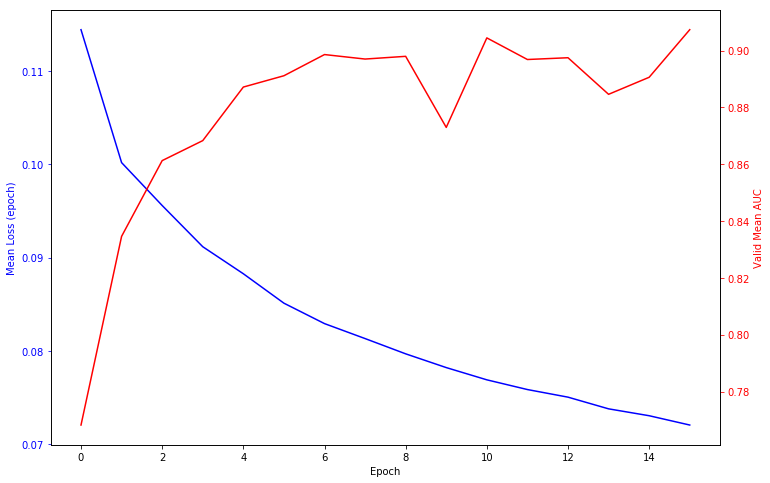

In [6]:
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 8)
ax1.plot(epoch_filt_lc['Epoch'], epoch_filt_lc['Mean Loss (epoch)'], 'b-')
ax1.set_ylabel('Mean Loss (epoch)', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xlabel('Epoch')
ax2 = ax1.twinx()
ax2.plot(epoch_filt_lc['Epoch'], epoch_filt_lc['Valid Mean AUC'], 'r-', label='Valid Mean AUC')
ax2.set_ylabel('Valid Mean AUC', color='r')
ax2.tick_params('y', colors='r')
fig.show()